## Clustering methods(DBSCAN, KMeans, Average link and Expectation Maximization)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import dbscan, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
!pip install texttable
import texttable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# #1
data = arff.loadarff('dataset1_noClusters7.arff')
df1 = pd.DataFrame(data[0])

dataset1 = df1.values[:, 0:df1.shape[1] - 1]

labels1 = df1.values[:,-1]

dataset1 = dataset1.astype('float64')

labels1 = labels1.astype('float64')


# #2
data = arff.loadarff('dataset2_noClusters3.arff')
df2 = pd.DataFrame(data[0])
dataset2 = df2.values[:, 0:df2.shape[1] - 1]
labels2 = df2.values[:,-1]
dataset2 = dataset2.astype('float64')
labels2 = labels2.astype('float64')

# #3
data = arff.loadarff('dataset3_noClusters3.arff')
df3 = pd.DataFrame(data[0])
dataset3 = df3.values[:, 0:df3.shape[1] - 1]
labels3 = df3.values[:,-1]
dataset3 = dataset3.astype('float64')
labels3 = labels3.astype('float64')


# #4
data = arff.loadarff('dataset4_noClusters2.arff')
df4 = pd.DataFrame(data[0])
dataset4 = df4.values[:, 0:df4.shape[1] - 1]
labels4 = df4.values[:,-1]
dataset4 = dataset4.astype('float64')
labels4 = labels4.astype('float64')

dfs=[df1,df2,df3,df4]
labell = [labels1,labels2,labels3,labels4]

"First we need to use the StandardScaler to make the data processed for this section"

In [36]:
def preprocess(data):
    scaled_data = StandardScaler().fit(data)
    data = scaled_data.transform(data)
    return data

In [37]:
#preprocess the data
data1=preprocess(dataset1)
data2=preprocess(dataset2)
data3=preprocess(dataset3)
data4=preprocess(dataset4)
datal=[data1,data2,data3,data4]

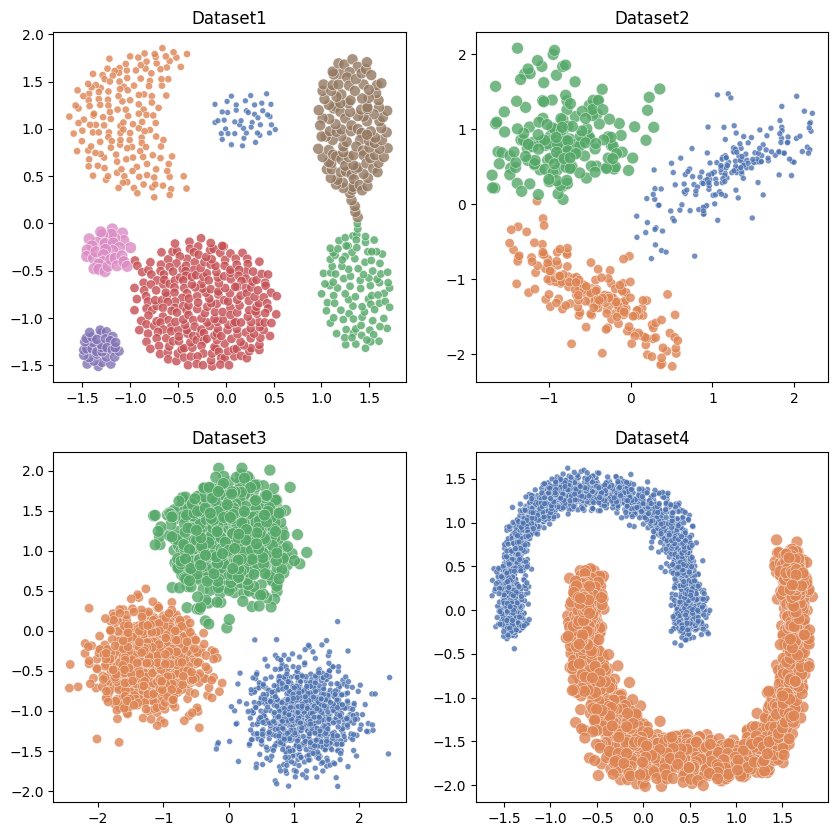

In [38]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2,2,figsize=(10, 10))
datal=[data1,data2,data3,data4]
labell = [labels1,labels2,labels3,labels4]
axls=[ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(4):
    sns.scatterplot(x = datal[i][:,0], y = datal[i][:,1], hue = labell[i], size = labell[i],  palette="deep",  alpha=0.8, ax=axls[i])
    axls[i].set_title("Dataset" + str(i+1))
    axls[i].get_legend().remove()
plt.show()

#### DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups closely packed points together and separates out sparsely located points. EPS (eps) and min_samples are two important parameters that are used to control the density of the clustering. EPS is the maximum distance between two samples for them to be considered in the same neighborhood, while min_samples is the minimum number of samples required in a neighborhood for a point to be considered a core point. These parameters are used to determine which points are considered to be part of a cluster and which points are considered to be noise or outliers.
For the choice of EPS, I defined a function called "find_eps_for_dbscan" and silhouette scores to determine the best value of eps for a dataset. I had the same approach for min samples by defining a function called "find_min_samples_for_dbscan"

In [39]:
def find_eps_for_dbscan(data, title): 
    # list to store silhouette scores
    silhouette_scores = []
    # list of epsilon values to try
    eps_list = np.linspace(0.01, 1, num=10)
    for eps in eps_list:
        dbscan = DBSCAN(eps=eps)
        labels = dbscan.fit_predict(data)
        # check if number of clusters is greater than 1
        if len(set(labels)) > 1:
            silhouette_scores.append(silhouette_score(data, labels))
        else:
            silhouette_scores.append(-1)
    # plot epsilon values against silhouette scores
    best_eps = eps_list[np.argmax(silhouette_scores)]

    return best_eps


In [40]:
def find_min_samples_for_dbscan(data, eps, title):
    # list to store silhouette scores
    silhouette_scores = []
    # list of min_samples values to try
    min_samples_list = range(2, 20)
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        # check if number of clusters is greater than 1
        if len(set(labels)) > 1:
            silhouette_scores.append(silhouette_score(data, labels))
        else:
            silhouette_scores.append(-1)
    best_min_samples = min_samples_list[np.argmax(silhouette_scores)]
    # print(f"Best min_samples value: {best_min_samples}")
    return best_min_samples


In [41]:
titles = ["dataset1", "dataset2", "dataset3", "dataset4"]
epsl=[]
min_sampless=[]
for i in range(4):
    eps = find_eps_for_dbscan(datal[i], titles[i])
    epsl.append(eps)
    min_samples = find_min_samples_for_dbscan(datal[i], eps, titles[i])
    min_sampless.append(min_samples)

In [42]:
dbscan_data1, dbscan_labels1 = dbscan(data1, eps=epsl[0], min_samples=min_sampless[0])
dbscan_data2, dbscan_labels2 = dbscan(data2, eps=epsl[1], min_samples=min_sampless[1])
dbscan_data3, dbscan_labels3 = dbscan(data3, eps=epsl[2], min_samples=min_sampless[2])
dbscan_data4, dbscan_labels4 = dbscan(data4, eps=epsl[3], min_samples=min_sampless[3])
dbscan_data = [dbscan_labels1,dbscan_labels2,dbscan_labels3,dbscan_labels4]
dbscan_labels = [dbscan_labels1,dbscan_labels2,dbscan_labels3,dbscan_labels4]
print('\033[1m' + "The Results for DBSCAN:"+ '\033[0m')
print("")
tt = texttable.Texttable()
tt.add_rows([['  Database ','  epsilon  ','Min samples', '    NMI    ','    RI     ']])
print(tt.draw())
for i in range(len(datal)):
    tt.add_rows([[str(i+1), epsl[i],min_sampless[i],normalized_mutual_info_score(labell[i], dbscan_labels[i]),adjusted_rand_score(labell[i], dbscan_labels[i])]])
    print(tt.draw())

The Results for DBSCAN:

+-------------+-------------+-------------+-------------+-------------+
|   Database  |    epsilon  | Min samples |       NMI   |       RI    |
+=============+=============+=============+=============+=============+
+-------------+-------------+-------------+-------------+-------------+
+-------------+-------------+-------------+-------------+-------------+
|      1      |    0.12     |      5      | 0.960401595 | 0.963292402 |
|             |             |             |   4867807   |   845298    |
+=============+=============+=============+=============+=============+
+-------------+-------------+-------------+-------------+-------------+
+-------------+-------------+-------------+-------------+-------------+
|      2      |    0.23     |      5      | 0.875557981 | 0.910760816 |
|             |             |             |   8057057   |   725474    |
+=============+=============+=============+=============+=============+
+-------------+-------------+----------

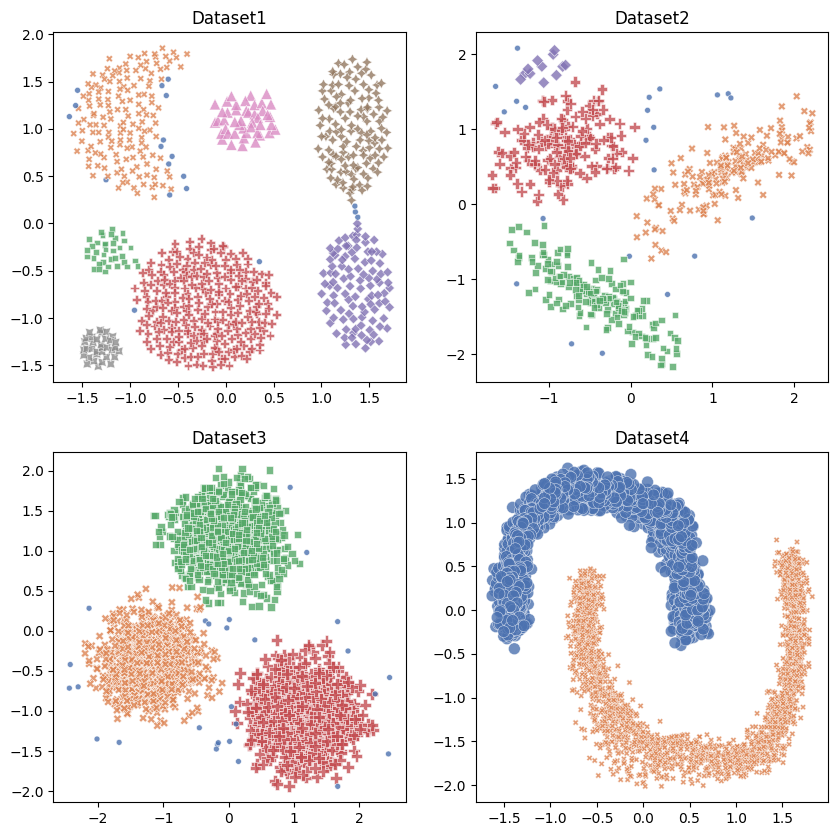

In [43]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
axls=[ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(4):
    dbscan_data, dbscan_labels = dbscan(datal[i], eps=epsl[i], min_samples=min_sampless[i])
    sns.scatterplot(x = datal[i][:,0], y = datal[i][:,1], hue = dbscan_labels,  style =dbscan_labels, size = dbscan_labels,  palette="deep",  alpha=0.8, ax=axls[i])
    axls[i].set_title("Dataset" + str(i+1))
    axls[i].get_legend().remove()
plt.show()

#### KMeans
Kmeans is one of the most popular and important clustering algorithm. It aims to partition data into k clusters in which each data point belongs to the cluster with the nearest mean

In [44]:
n_clusters_list = []
for i in range(len(dfs)):
    n_clusters = len(np.unique(labell[i]))
    n_clusters_list.append(n_clusters)

In [45]:
for i in range(len(dfs)):
    kmeans_data = KMeans(n_clusters = n_clusters_list[i]).fit(datal[i])
    centroids = kmeans_data.cluster_centers_
    print(titles[i].capitalize(),"\nk =", n_clusters_list[i])
    print("NMI =", normalized_mutual_info_score(labell[i], kmeans_data.labels_))
    print("RI =", adjusted_rand_score(labell[i], kmeans_data.labels_),'\n')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset1 
k = 7
NMI = 0.8326659603134745
RI = 0.7173820623237965 

Dataset2 
k = 3
NMI = 0.8741103315070664
RI = 0.9031017133441159 

Dataset3 
k = 3
NMI = 0.9903681930499401
RI = 0.9949201015264262 



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset4 
k = 2
NMI = 0.3248266059913712
RI = 0.41425590970764076 



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


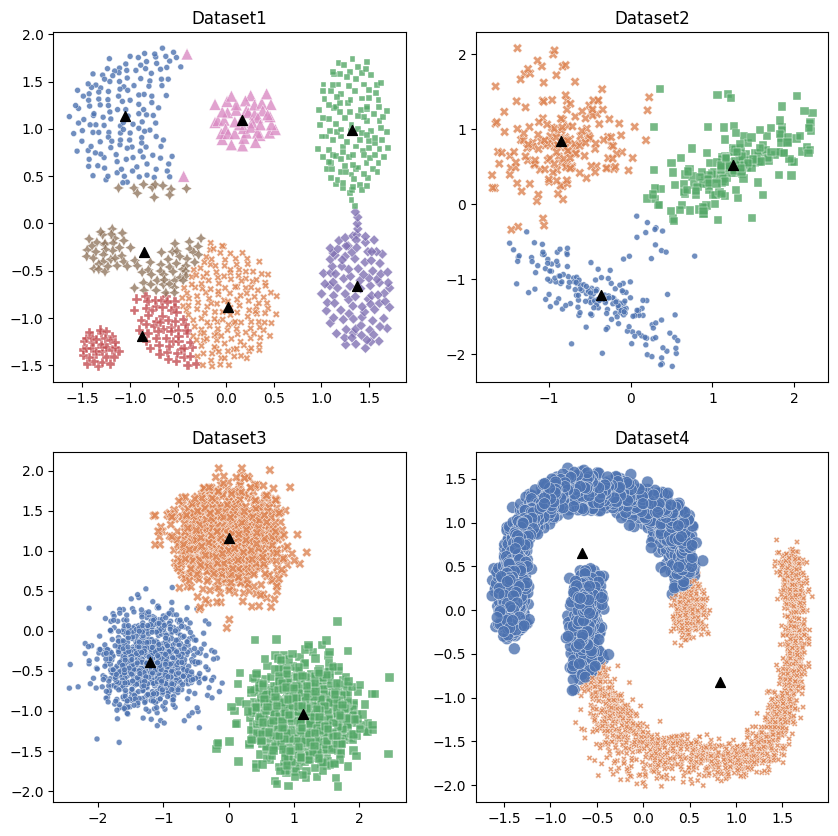

In [46]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
axls=[ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(4):
    kmeans_data = KMeans(n_clusters=n_clusters_list[i]).fit(datal[i])
    centroids = kmeans_data.cluster_centers_
    axls[i].scatter(centroids[:, 0], centroids[:, 1], marker="^", s=50, linewidths=1, color="black", zorder=20)
    sns.scatterplot(x = datal[i][:,0], y = datal[i][:,1], hue = kmeans_data.labels_, size = kmeans_data.labels_,style=kmeans_data.labels_,  palette="deep",  alpha=0.8, ax=axls[i])
    axls[i].set_title("Dataset" + str(i+1))
    axls[i].get_legend().remove()
plt.show()

#### Expectation Maximization (EM)
EM algorithm has comparable results to the k-means algorithm. Both algorithms are quite similar, however, EM algorithm calculates the probabilities of cluster membership based on one or more probability distributions.

In [47]:
for i in range(len(dfs)):
    em_labels = GaussianMixture(n_clusters_list[i]).fit_predict(datal[i])
    print(titles[i].capitalize(),"\nk =", n_clusters_list[i])
    print("NMI =", normalized_mutual_info_score(labell[i], em_labels))
    print("RI =", adjusted_rand_score(labell[i], em_labels),'\n')

Dataset1 
k = 7
NMI = 0.9038231776199894
RI = 0.7859511381524438 

Dataset2 
k = 3
NMI = 0.9579579606026477
RI = 0.9740072796039211 

Dataset3 
k = 3
NMI = 0.9872347608204501
RI = 0.9928945250461099 

Dataset4 
k = 2
NMI = 0.33018252330655923
RI = 0.42124759541717277 



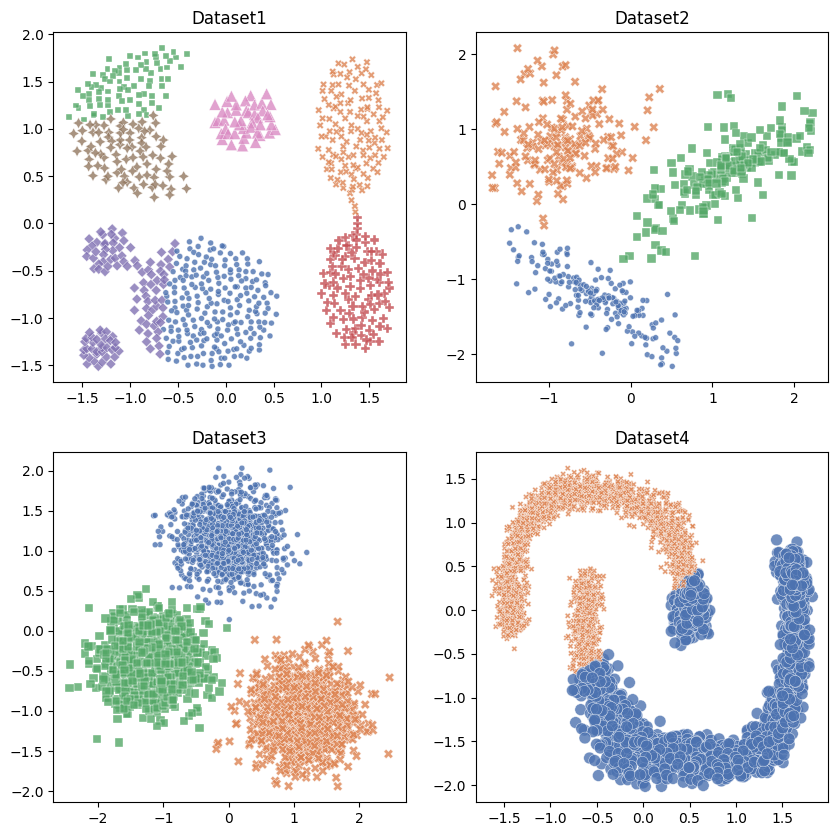

In [48]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
axls=[ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(4):
    em_labels = GaussianMixture(n_clusters_list[i]).fit_predict(datal[i])
    sns.scatterplot(x = datal[i][:,0], y = datal[i][:,1], hue = em_labels,style=em_labels, size = em_labels,  palette="deep",  alpha=0.8, ax=axls[i])
    axls[i].set_title("Dataset" + str(i+1))
    axls[i].get_legend().remove()
plt.show()

#### Average Link
This method groups samples together based on the level of similarity between them. It employs a suitable metric (such as a measure of distance) to determine the dissimilarity between sets of observations and uses a linkage criterion that calculates the dissimilarity of sets as a function of the distances between individual observations within those sets.

In [49]:
for i in range(len(dfs)):
    clustering = AgglomerativeClustering(n_clusters=n_clusters_list[i], linkage='average').fit(datal[i])
    print(titles[i].capitalize(),"\nk =", n_clusters_list[i])
    print("NMI =", normalized_mutual_info_score(labell[i], clustering.labels_))
    print("RI =", adjusted_rand_score(labell[i], clustering.labels_),'\n')

Dataset1 
k = 7
NMI = 0.9869394410981247
RI = 0.991326806021418 

Dataset2 
k = 3
NMI = 0.8761931978064611
RI = 0.9034966778018448 

Dataset3 
k = 3
NMI = 0.9880979848033365
RI = 0.9944130197775344 

Dataset4 
k = 2
NMI = 0.40449001260784606
RI = 0.3458457935135909 



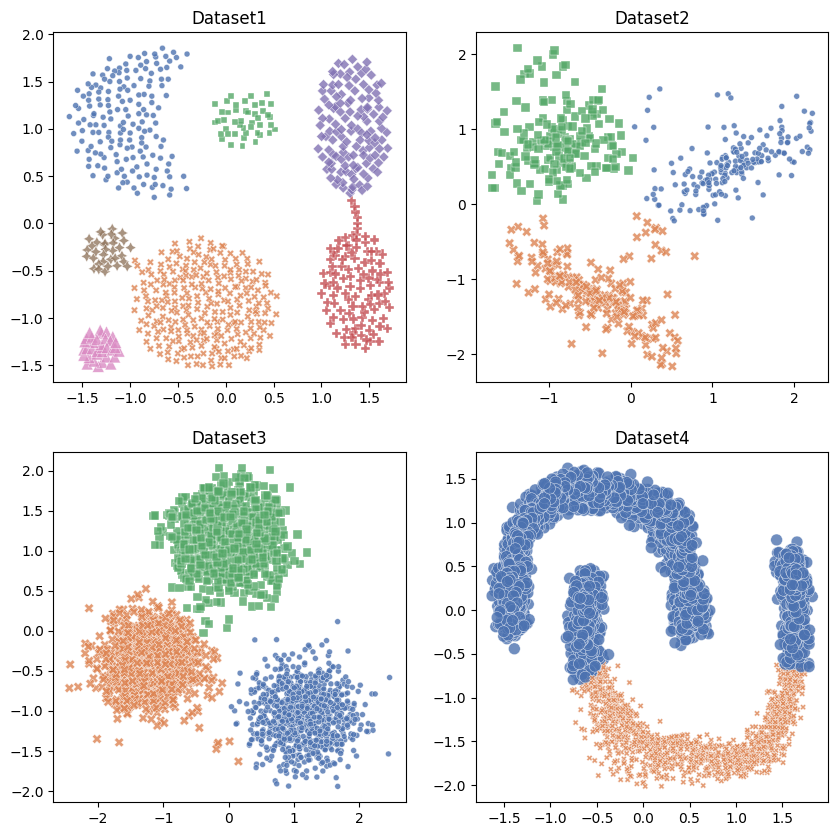

In [50]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
axls=[ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(4):
    clustering = AgglomerativeClustering(n_clusters=n_clusters_list[i], linkage='average').fit(datal[i])
    sns.scatterplot(x = datal[i][:,0], y = datal[i][:,1], hue = clustering.labels_,style=clustering.labels_, size = clustering.labels_,  palette="deep",  alpha=0.8, ax=axls[i])
    axls[i].set_title("Dataset" + str(i+1))
    axls[i].get_legend().remove()
plt.show()

Based on the results, it appears that the DBSCAN algorithm performed the best overall, with NMI and RI values closest to 1.0 for all four datasets. This suggests that DBSCAN was able to accurately identify the clusters in the data. One possible reason for this is that DBSCAN is a density-based algorithm, which means it is able to identify clusters even when they are not spherical in shape, and can also handle datasets with varying densities.

The k-means algorithm also performed well for some datasets (dataset1, dataset2 and dataset3) with NMI and RI values close to 1.0, but it performed poorly for dataset4 with NMI and RI values close to 0.3 and 0.4 respectively. This is because k-means algorithm assumes that clusters are spherical in shape and have equal variance, which may not be the case for all datasets.

The Expectation Maximization (EM) algorithm also performed well for some datasets (dataset2 and dataset3) with NMI and RI values close to 1.0 but performed poorly for dataset4 with NMI and RI values close to 0.3 and 0.4 respectively. The reason for poor performance of EM in these datasets may be that the algorithm assumes that the data is generated from a Gaussian distribution and this assumption may not hold for all datasets.

The Average Link algorithm also performed well for some datasets (dataset1, dataset3) with NMI and RI values close to 1.0 but performed poorly for dataset4 with NMI and RI values close to 0.3 and 0.4 respectively. The reason for poor performance of Average Link algorithm in these datasets may be that the algorithm assumes that the data is generated from a Gaussian distribution and this assumption may not hold for all datasets.

Regarding the parameters used for DBSCAN, eps and min_samples, it seems that different values were used for each dataset. The values of eps and min_samples for each dataset are relatively small, it suggests that the clusters are relatively dense and that DBSCAN is able to identify them.

In summary, DBSCAN algorithm performed the best overall, but k-means, EM and Average Link also performed well for some datasets. The poor performance of some clustering methods may be due to the assumptions that those algorithms make about the data, which may not hold for all datasets. The choice of algorithm and its parameters should be based on the characteristics of the data.